# Titanic Exploratory Data Analysis

# Introduction

This is an exploration of the Titanic dataset. My goal is to get an in depth understanding of the data.

## Outline

1. [Get the data](#obtain)
1. [Explore the data](#explore)

<a id='obtain'></a>

# Get the data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
test = pd.read_csv('test.csv')   # for basic checks
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [5]:
len(test)

418

In [6]:
total_len = len(train) + len(test)
print(len(train) / total_len * 100)
print(len(test) / total_len * 100)

68.0672268907563
31.932773109243694


To summarise:
* There are 891 instances in the training set, each one representing a unique passenger.
* There are 12 attributes: two of these are `float64`, five are `int64`, and the remaining five are `object`s.
* The target attribute is `Survived`, so it is not present on the test set. Additionally, it has no missing values.
* `Age`, `Cabin`, `Embarked` have missing values in the training set.
* In the test set, `Age`, `Cabin`, and `Fare` have missing values.
* `PassengerId` is a running index. Therefore, it will not provide any useful information during modelling and can be dropped.
* The dataset is split 70/30 into training and test sets.

In [7]:
train = train.drop(columns='PassengerId')

<a id='explore'></a>

# Explore the data

I will first explore the numerical attributes, followed by the categorical attributes.

## Numerical attributes

In [8]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


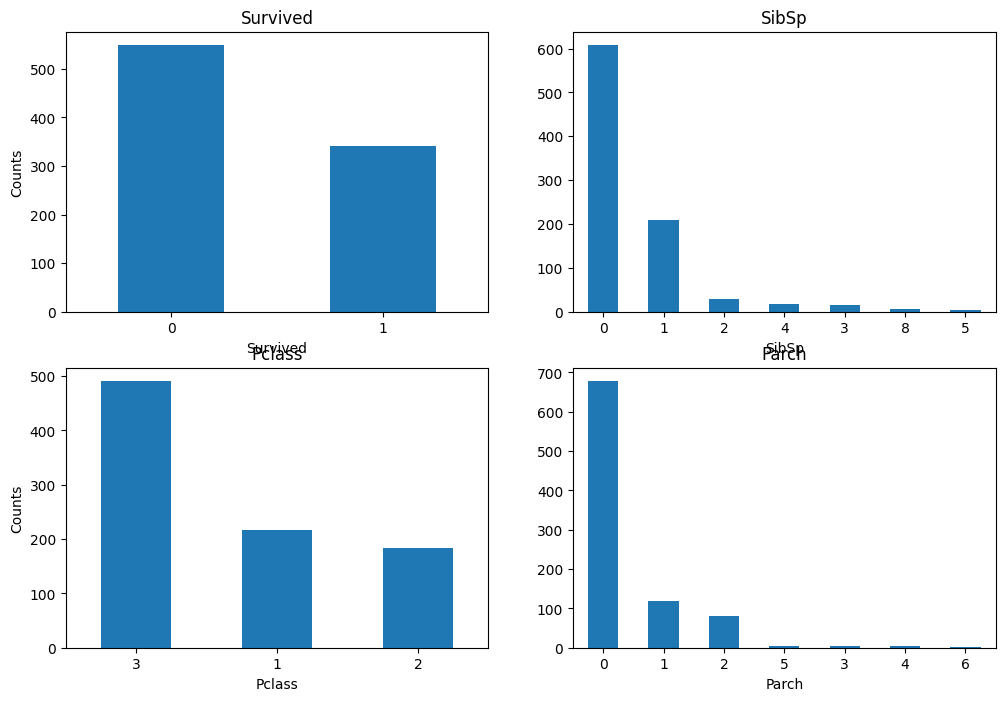

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(12,8))
train['Survived'].value_counts().plot.bar(ax=ax[0,0], title='Survived')
train['Pclass'].value_counts().plot.bar(ax=ax[1,0], title='Pclass')
train['SibSp'].value_counts().plot.bar(ax=ax[0,1], title='SibSp')
train['Parch'].value_counts().plot.bar(ax=ax[1,1], title='Parch')
plt.setp(ax[:, 0], ylabel='Counts')
plt.setp(ax[0,0].xaxis.get_majorticklabels(), rotation=360)
plt.setp(ax[1,0].xaxis.get_majorticklabels(), rotation=360)
plt.setp(ax[0,1].xaxis.get_majorticklabels(), rotation=360)
plt.setp(ax[1,1].xaxis.get_majorticklabels(), rotation=360);

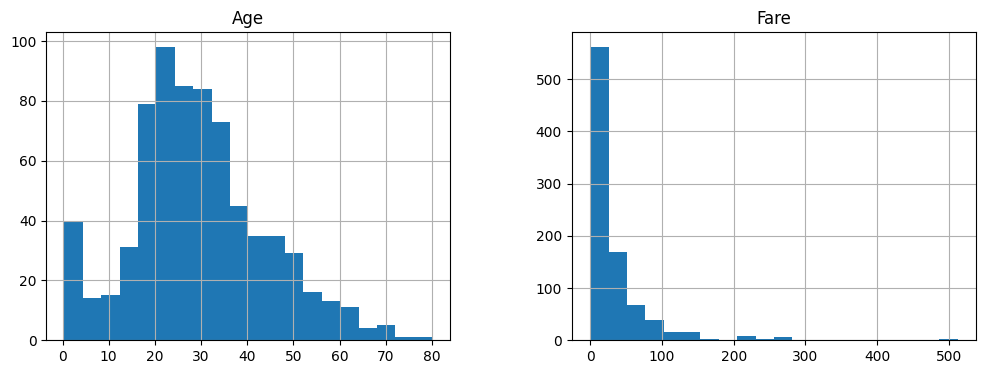

In [10]:
age_fare = train[['Age', 'Fare']]
age_fare.hist(bins=20, figsize=(12,4));

In [11]:
print(train['Survived'].value_counts())
print('\n')
print(train['Survived'].value_counts() / len(train) * 100)
print('\n')
print('0 = No, 1 = Yes')

Survived
0    549
1    342
Name: count, dtype: int64


Survived
0    61.616162
1    38.383838
Name: count, dtype: float64


0 = No, 1 = Yes


The target attribute `Survived` is a binary attribute where 0 = No and 1 = Yes. Most passengers (62%) did not survive. `Pclass`, which represents ticket class, is an ordinal integer feature where 1 = 1st, 2 = 2nd, and 3 = 3rd class ticket. The majority of passengers had a 3rd class ticket, followed by 1st class, and then 2nd class. I will keep `Survived` and `Pclass`, as well as `SibSp` and `Parch`, as numerical attributes as most machine learning algorithms cannot work with categorical features.

For the remaining numerical attributes:
* `Age` approximates a normal distribution, but it is slightly skewed to the right.
* `Fare` is heavily skewed to the right.
* These attributes may need to be transformed later on to have a more bell-shaped distribution.
* There are some very different scales here (e.g., `Age` ranges from 0–80 while `Fare` appears to have values at about 500), so feature scaling will be necessary.

A very simple classifier might predict 'No' for every instance, given that most passengers did not survive. Doing this would result in an accuracy of about 60%. This 60% baseline is the benchmark for understanding how other factors (like Class and Gender) influence survival.

### `Age`

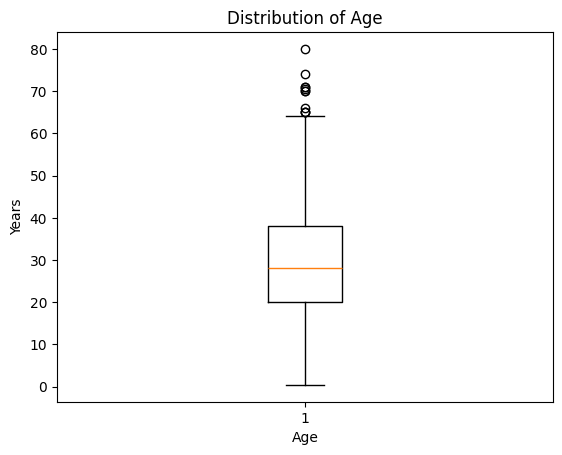

In [12]:
plt.boxplot([train['Age'].dropna(axis=0)]) # drop missing values otherwise it will not work
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Years');

In [13]:
q_1, q_3 = np.percentile(train['Age'].dropna(axis=0), [25, 75])
IQR = q_3 - q_1
upper_bound = q_3 + (1.5 * IQR)
age_outliers = train[train['Age'] > upper_bound]
age_outliers

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
456,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S
493,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S


In [14]:
len(age_outliers)

11

There are 11 data points above the upper bound (3rd quartile + 1.5 times the IQR).

In [15]:
print(np.min(age_outliers['Age']))
print(np.max(age_outliers['Age']))

65.0
80.0


These values seem reasonable.

Were younger passengers more likely to survive compared to older passengers?

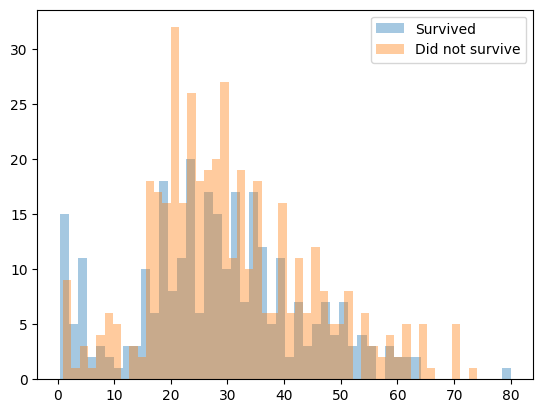

In [16]:
surv = train[train['Survived'] == 1]
surv_no = train[train['Survived'] == 0]

surv_age = surv['Age'].dropna(axis=0)
surv_no_age = surv_no['Age'].dropna(axis=0)

plt.hist(surv_age, bins=50, alpha=0.4, label='Survived')
plt.hist(surv_no_age, bins=50, alpha=0.4, label='Did not survive')
plt.legend(loc='upper right');

Survival was higher for very young children (< 5 years of age). Additionally, there appears to be many young adults (up to about 30 years of age) who did not survive. Otherwise the distributions are similar.

### `Fare`

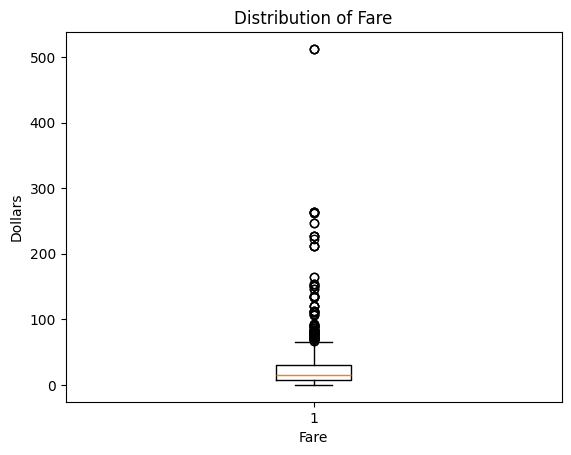

In [17]:
plt.boxplot(train['Fare'])
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Dollars');

In [18]:
q_1, q_3 = np.percentile(train['Fare'], [25, 75])
IQR = q_3 - q_1
upper_bound = q_3 + (1.5 * IQR)
fare_outliers = train[train['Fare'] > upper_bound]
fare_outliers

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
27,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
34,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
52,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...
846,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S
849,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
856,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S


In [19]:
train[train['Fare'] > 500]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [20]:
len(fare_outliers)

116

In [21]:
len(fare_outliers) / len(train) * 100

13.019079685746352

The `Fare` values of 512.33 are extreme. Additionally, there are 116 data points above the upper bound (3rd quartile + 1.5 times the IQR). This is 13% of all `Fare` values.

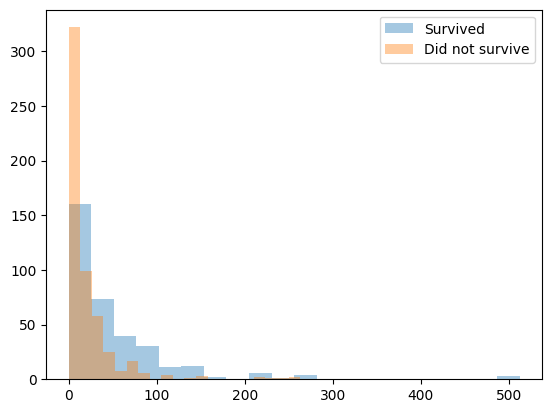

In [22]:
surv = train[train['Survived'] == 1]
surv_no = train[train['Survived'] == 0]

surv_fare = surv['Fare'].dropna(axis=0)
surv_no_fare = surv_no['Fare'].dropna(axis=0)

plt.hist(surv_fare, bins=20, alpha=0.4, label='Survived')
plt.hist(surv_no_fare, bins=20, alpha=0.4, label='Did not survive')
plt.legend(loc='upper right');

Additionally, as seen from the above plot, there appears to be many low/zero fare entries, particularly for those passengers that did not survive.

In [23]:
len(surv[surv['Fare'] <= 10])

67

In [24]:
len(surv_no[surv_no['Fare'] <= 10])

269

In [25]:
len(surv_no[surv_no['Fare'] == 0])

14

Highly skewed data can make it difficult to visualize patterns. One way to analyze this better is by transforming the attribute logarithmically.

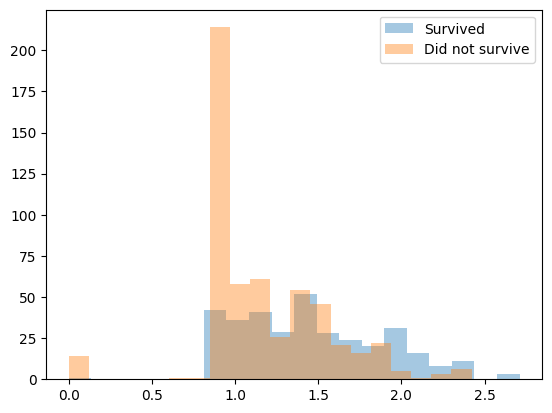

In [26]:
surv = train[train['Survived'] == 1]
surv_no = train[train['Survived'] == 0]

surv_fare = np.log10(surv['Fare'].dropna(axis=0).values+1)       # to adjust fare entries which are 0
surv_no_fare = np.log10(surv_no['Fare'].dropna(axis=0).values+1)

plt.hist(surv_fare, bins=20, alpha=0.4, label='Survived')
plt.hist(surv_no_fare, bins=20, alpha=0.4, label='Did not survive')
plt.legend(loc='upper right');

Passengers that did not survive typically paid less for their fare compared to those that did survive.

#### `Parch` and `SibSp`

How many passengers travelled alone (i.e., had a value of 0 for both `Parch` and `SibSp`)? Were they more likely to survive compared to those that travelled with family?

In [27]:
cond1 = train['Parch'] == 0
cond2 = train['SibSp'] == 0
len(train[cond1 & cond2])

537

In [28]:
cond1 = train['Parch'] == 0
cond2 = train['SibSp'] == 0
alone = train[cond1 & cond2]

cond1 = train['Parch'] != 0
cond2 = train['SibSp'] != 0
not_alone = train[cond1 & cond2]

print('Alone:')
print((alone['Survived'].value_counts()) / len(alone) * 100)
print('\n')
print('Not alone:')
print((not_alone['Survived'].value_counts()) / len(not_alone) * 100)

Alone:
Survived
0    69.646182
1    30.353818
Name: count, dtype: float64


Not alone:
Survived
0    56.338028
1    43.661972
Name: count, dtype: float64


In [29]:
train['TravellingAlone'] = 0
cond = (train['Parch'] == 0) & (train['SibSp'] == 0)
train.loc[cond, 'TravellingAlone'] = 1
train['TravellingAlone'].value_counts().sort_values(ascending=True)

TravellingAlone
0    354
1    537
Name: count, dtype: int64

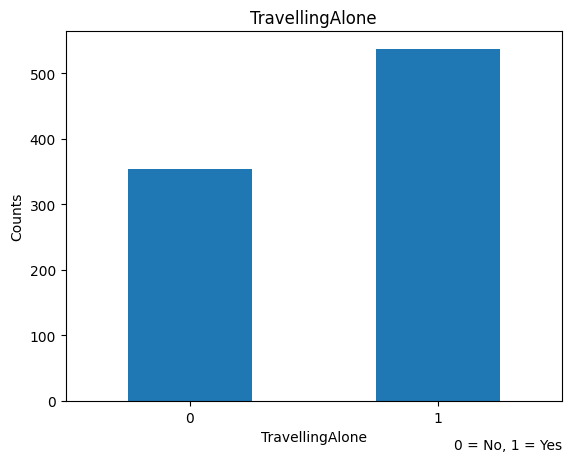

In [30]:
train['TravellingAlone'].value_counts(ascending=True).plot.bar()
plt.title('TravellingAlone')
plt.xticks(rotation=360)
plt.ylabel('Counts')
plt.figtext(0.90, 0.01, '0 = No, 1 = Yes', horizontalalignment='right');

In [31]:
print(alone['Survived'].value_counts())
print('\n')
print(alone['Survived'].value_counts() / len(alone) * 100)

Survived
0    374
1    163
Name: count, dtype: int64


Survived
0    69.646182
1    30.353818
Name: count, dtype: float64


In [32]:
print(not_alone['Survived'].value_counts().sort_values(ascending=False))
print('\n')
print(not_alone['Survived'].value_counts().sort_values(ascending=False) / len(not_alone) * 100)

Survived
0    80
1    62
Name: count, dtype: int64


Survived
0    56.338028
1    43.661972
Name: count, dtype: float64


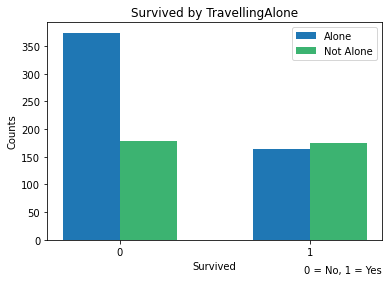

In [33]:
alone = train[train['TravellingAlone'] == 1]
not_alone = train[train['TravellingAlone'] == 0]

survived_alone = alone['Survived'].value_counts()
survived_not_alone = not_alone['Survived'].value_counts().sort_values(ascending=False)

n_groups = 2
index = np.arange(n_groups)

width = 0.3

plt.bar(np.arange(len(survived_alone)), survived_alone, width=width, label='Alone')
plt.bar(np.arange(len(survived_not_alone)) + 0.3, survived_not_alone, width=width, label='Not Alone', color='mediumseagreen')
plt.xticks(index + 0.15, ('0', '1'), rotation=360)
plt.title('Survived by TravellingAlone')
plt.xlabel('Survived')
plt.ylabel('Counts')
plt.legend()
plt.figtext(0.90, 0.01, '0 = No, 1 = Yes', horizontalalignment='right');

Most passengers (537) were travelling alone. Of these passengers, 30% survived. In comparison, the survival of passengers who were *not* travelling alone was 49%. I wonder if survival varies as a function of `SibSp` and/or `Parch`? In particular, perhaps the likelihood of survival increases up until a certain point (large families might be a hindrance).

## Categorical attributes

### `Name`

In [34]:
train['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [35]:
train['Name'].tail()

886                       Montvila, Rev. Juozas
887                Graham, Miss. Margaret Edith
888    Johnston, Miss. Catherine Helen "Carrie"
889                       Behr, Mr. Karl Howell
890                         Dooley, Mr. Patrick
Name: Name, dtype: object

### `Sex`

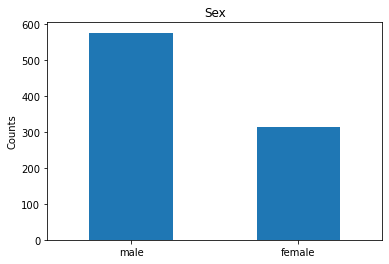

In [36]:
train['Sex'].value_counts().plot.bar()
plt.title('Sex')
plt.xticks(rotation=360)
plt.ylabel('Counts');

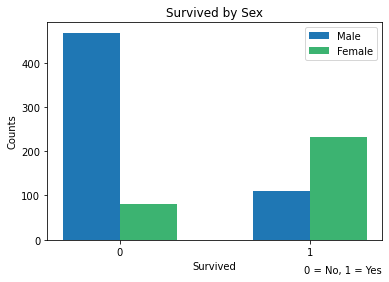

In [37]:
males = train[train['Sex'] == 'male']
females = train[train['Sex'] == 'female']

survived_males = males['Survived'].value_counts()
survived_females = females['Survived'].value_counts().sort_values(ascending=True)

n_groups = 2
index = np.arange(n_groups)

width = 0.3

plt.bar(np.arange(len(survived_males)), survived_males, width=width, label='Male')
plt.bar(np.arange(len(survived_females)) + 0.3, survived_females, width=width, label='Female', color='mediumseagreen')
plt.xticks(index + 0.15, ('0', '1'), rotation=360)
plt.title('Survived by Sex')
plt.xlabel('Survived')
plt.ylabel('Counts')
plt.legend()
plt.figtext(0.90, 0.01, '0 = No, 1 = Yes', horizontalalignment='right');

The majority of female passengers survived.

### `Ticket`

In [38]:
train['Ticket'].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [39]:
train['Ticket'].tail()

886        211536
887        112053
888    W./C. 6607
889        111369
890        370376
Name: Ticket, dtype: object

In [40]:
train['Ticket'].value_counts()

CA. 2343    7
1601        7
347082      7
CA 2144     6
3101295     6
           ..
347083      1
7540        1
349206      1
349249      1
364499      1
Name: Ticket, Length: 681, dtype: int64

According to the data dictionary, `Ticket`represents ticket number. I'm not sure how helpful this will be. Of those passengers with a ticket number, what do they have in common?

In [41]:
train[train['Ticket'] == 'CA. 2343']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TravellingAlone
159,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,0
180,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,0
201,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,0
324,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,0
792,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,0
846,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,0
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S,0


In [42]:
train[train['Ticket'] == '347082']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TravellingAlone
13,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S,0
119,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S,0
541,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,NaN,S,0
542,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,NaN,S,0
610,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,NaN,S,0
813,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,NaN,S,0
850,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,NaN,S,0


These passengers were in the same family.

### `Cabin`

In [43]:
train['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [44]:
train['Cabin'].tail()

886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, dtype: object

In [45]:
train['Cabin'].value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
E101           3
F2             3
              ..
E10            1
A34            1
D7             1
B79            1
C32            1
Name: Cabin, Length: 147, dtype: int64

The letter prefix (e.g., `G`, `C`) might provide useful information for the model. Perhaps this represents sections of the ship.

In [46]:
train['CabinLetter'] = train['Cabin'].str[:1]
train['CabinLetter'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: CabinLetter, dtype: int64

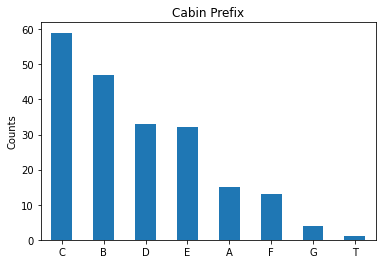

In [47]:
train['CabinLetter'].value_counts().plot.bar()
plt.title('Cabin Prefix')
plt.xticks(rotation=360)
plt.ylabel('Counts');

In [48]:
train[train['CabinLetter'] == 'C'].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TravellingAlone,CabinLetter
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,C
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,C
11,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,1,C
27,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,0,C
55,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S,1,C


In [49]:
train['CabinLetter'].fillna('unassigned', inplace=True) # For passengers without an assigned cabin, give them a value of 'unassigned'
train['CabinLetter'].value_counts()

unassigned    687
C              59
B              47
D              33
E              32
A              15
F              13
G               4
T               1
Name: CabinLetter, dtype: int64

In [50]:
train['Cabin'].isnull().sum()

687

Additionally, there are many missing values for `Cabin`. Of those passengers that have a value for `Cabin`, what do they have in common?

In [51]:
cabin_notnull = train[train['Cabin'].notnull()]
cabin_notnull.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TravellingAlone,CabinLetter
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,C
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,C
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,E
10,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0,G
11,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,1,C


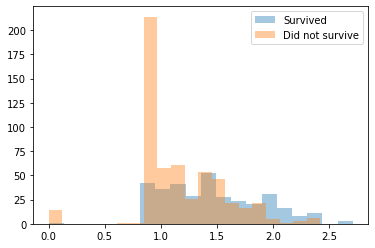

In [52]:
surv = train[train['Survived'] == 1]
surv_no = train[train['Survived'] == 0]

surv_fare = np.log10(surv['Fare'].dropna(axis=0).values+1)       # to adjust fare entries which are 0
surv_no_fare = np.log10(surv_no['Fare'].dropna(axis=0).values+1)

plt.hist(surv_fare, bins=20, alpha=0.4, label='Survived')
plt.hist(surv_no_fare, bins=20, alpha=0.4, label='Did not survive')
plt.legend(loc='upper right');

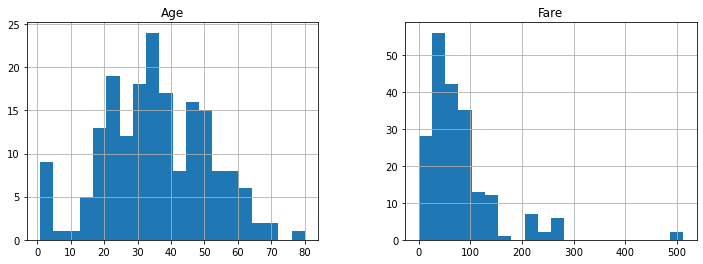

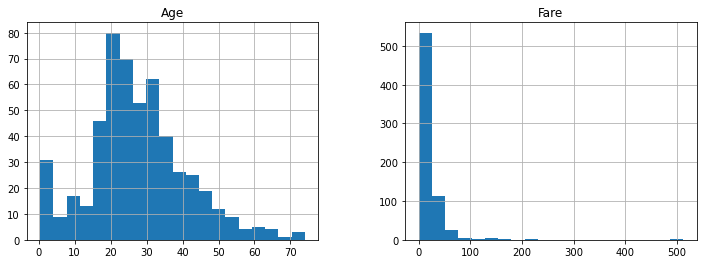

In [53]:
# Passengers where Cabin is not missing
age_fare_notnull = cabin_notnull[['Age', 'Fare']]
age_fare_notnull.hist(bins=20, figsize=(12,4), label='Assigned cabin')

# Passengers where Cabin is missing
cabin_null = train[train['Cabin'].isnull()]
age_fare_null = cabin_null[['Age', 'Fare']]
age_fare_null.hist(bins=20, figsize=(12,4), label='No cabin assigned');

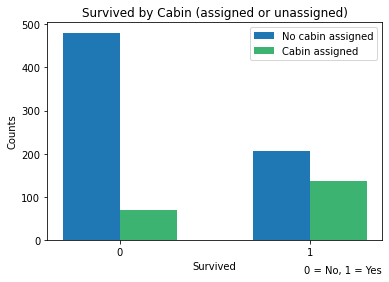

In [54]:
counts_null = cabin_null['Survived'].value_counts()
counts_notnull = cabin_notnull['Survived'].value_counts().sort_values(ascending=True)

n_groups = 2
index = np.arange(n_groups)

width = 0.3

plt.bar(np.arange(len(counts_null)), counts_null, width=width, label='No cabin assigned')
plt.bar(np.arange(len(counts_notnull)) + 0.3, counts_notnull, width=width, label='Cabin assigned', color='mediumseagreen')
plt.xticks(index + 0.15, ('0', '1'), rotation=360)
plt.title('Survived by Cabin (assigned or unassigned)')
plt.xlabel('Survived')
plt.ylabel('Counts')
plt.legend()
plt.figtext(0.90, 0.01, '0 = No, 1 = Yes', horizontalalignment='right');

The majority of passengers with an assigned `Cabin` survived. I will create `CabinAssigned` to indicate whether or not a passenger was assigned a cabin. `CabinLetter`, which provides additional information (deck letters and unassigned), is also promising. Later I will compute the correlation between these derived features and `Survived` to see their potential usefulness for modelling.

In [55]:
train['CabinAssigned'] = train['Cabin'].notnull().convert_dtypes(convert_boolean=False)

### `Embarked`

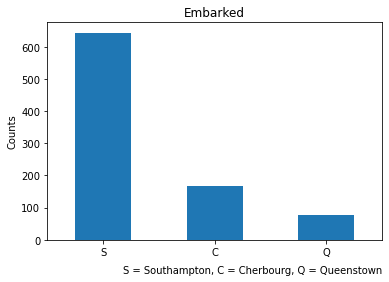

In [56]:
train['Embarked'].value_counts(ascending=False).plot.bar()
plt.title('Embarked')
plt.xticks(rotation=360)
plt.ylabel('Counts')
plt.figtext(0.90, 0.01, 'S = Southampton, C = Cherbourg, Q = Queenstown', horizontalalignment='right');

In [57]:
print('Counts:')
print(train['Embarked'].value_counts(ascending=False))
print('\n')
print('%:')
print(train['Embarked'].value_counts(ascending=False) / len(train) * 100)

Counts:
S    644
C    168
Q     77
Name: Embarked, dtype: int64


%:
S    72.278339
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64


Most passengers embarked from Southampton. Were these people more or less likely to survive? How does `Embarked` relate to other attributes such as `Pclass`?

### `Pclass`

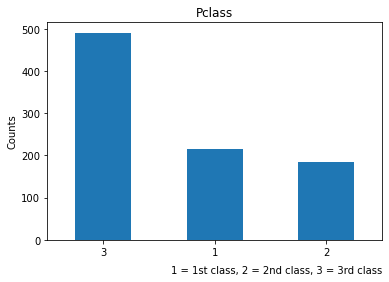

In [58]:
train['Pclass'].value_counts(ascending=False).plot.bar()
plt.title('Pclass')
plt.xticks(rotation=360)
plt.ylabel('Counts')
plt.figtext(0.90, 0.01, '1 = 1st class, 2 = 2nd class, 3 = 3rd class', horizontalalignment='right');

`Pclass` is a categorical attribute (ticket class) that has been encoded as numerical (1 = 1st, 2 = 2nd, and 3 = 3rd class).

## Missing values

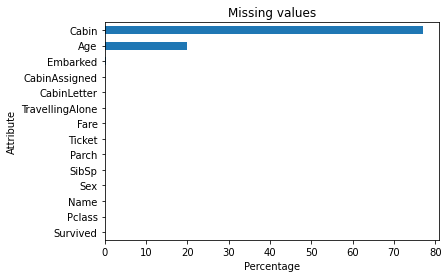

In [59]:
(train.isnull().sum().sort_values(ascending=True) / len(train) * 100).plot.barh()
plt.title('Missing values')
plt.xlabel('Percentage')
plt.ylabel('Attribute');

In [60]:
print('Missing counts:')
print(train.isnull().sum().sort_values(ascending=False))
print('\n')
print('Missing %:')
print(train.isnull().sum().sort_values(ascending=False) / len(train) * 100)

Missing counts:
Cabin              687
Age                177
Embarked             2
CabinAssigned        0
CabinLetter          0
TravellingAlone      0
Fare                 0
Ticket               0
Parch                0
SibSp                0
Sex                  0
Name                 0
Pclass               0
Survived             0
dtype: int64


Missing %:
Cabin              77.104377
Age                19.865320
Embarked            0.224467
CabinAssigned       0.000000
CabinLetter         0.000000
TravellingAlone     0.000000
Fare                0.000000
Ticket              0.000000
Parch               0.000000
SibSp               0.000000
Sex                 0.000000
Name                0.000000
Pclass              0.000000
Survived            0.000000
dtype: float64


`Cabin`, `Age`, and `Embarked` have missing values ranging from 0.2%–77.1%. I will impute missing `Embarked` values (most likely with the mode `S`) because there are so few. I may need to drop `Cabin` because there are so many missing values (687), and I'm not sure what to do about `Age` just yet (177 missing).

In [61]:
print('Missing counts:')
print(test.isnull().sum().sort_values(ascending=False))

Missing counts:
Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64


On the test set, `Cabin`, `Age`, and `Fare` have missing values. Any imputations applied to the training set will also need to be applied to the test set. `Cabin` will most likely be dropped and replaced with a derived feature such as `CabinAssigned`.

## Correlations

In [62]:
make_num = {'Sex':         {'male': 0, 'female': 1},
            'Embarked':    {'S': 0, 'C': 1, 'Q': 2},
            'CabinLetter': {'unassigned': 0,
                            'C': 1,
                            'B': 2,
                            'D': 3,
                            'E': 4,
                            'A': 5,
                            'F': 6,
                            'G': 7,
                            'T': 8}
           }

train.replace(make_num, inplace=True)

In [63]:
corr_matrix = train.corr()

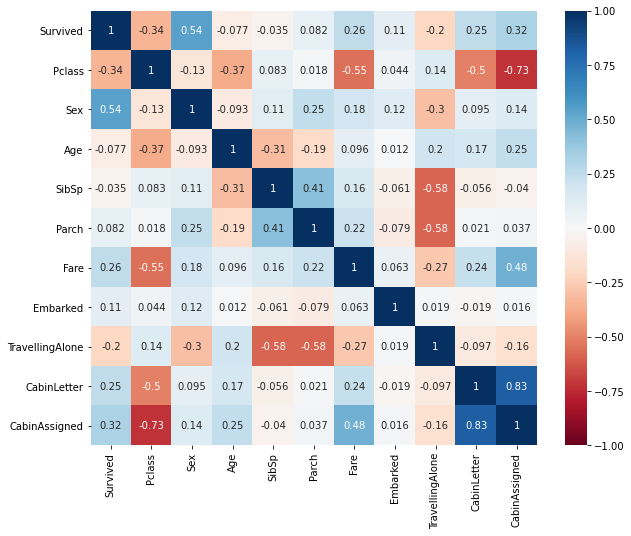

In [64]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, cmap='RdBu');

In [65]:
corr_matrix['Survived'].sort_values(ascending=False)

Survived           1.000000
Sex                0.543351
CabinAssigned      0.316912
Fare               0.257307
CabinLetter        0.251321
Embarked           0.108669
Parch              0.081629
SibSp             -0.035322
Age               -0.077221
TravellingAlone   -0.203367
Pclass            -0.338481
Name: Survived, dtype: float64

To summarise the correlations above:
* There is a moderate positive relationship between `Survived` and `Sex`. This indicates that females were more likely to survive than males (0 = male, 1 = female).
* There is a moderate negative relationship between `Survived` and `Pclass`. So, passengers in a higher ticket class (e.g., 1st class) were more likely to survive than passengers in a lower ticket class (e.g., third class).
* There is a moderate positive relationship between `Survived` and `CabinAssigned` (the attribute I derived earlier, which indicates whether or not a passenger has an assigned cabin).
* `CabinLetter` has a weaker association with `Survived` compared to the other cabin attribute I derived, `CabinAssigned`. Perhaps the extra information is not so helpful.
* There is a weak positive relationship between `Survived` and `Fare`. So, those that paid more for their ticket were more likely to to survive than those that paid less.
* `Parch`, `SibSp`, and `Age` don't have much of a linear relationship with `Survived`. Perhaps there is some additional feature engineering work that can be done with these attributes.
* I derived `TravellingAlone` from `SibSp` and `Parch`. This attribute has a stronger, negative relationship with `Survived`. So, passengers that were not travelling alone were more likely to survive compared to passengers that were.